<a href="https://colab.research.google.com/github/AkshatParikh16/Stock-Market-Analysis-using-LSTM/blob/main/Stock_Market_Analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rpaguirre_tesla_stock_price_path = kagglehub.dataset_download('rpaguirre/tesla-stock-price')
camnugent_sandp500_path = kagglehub.dataset_download('camnugent/sandp500')
hershyandrew_amzn_dpz_btc_ntfx_adjusted_may_2013may2019_path = kagglehub.dataset_download('hershyandrew/amzn-dpz-btc-ntfx-adjusted-may-2013may2019')
tarunpaparaju_apple_aapl_historical_stock_data_path = kagglehub.dataset_download('tarunpaparaju/apple-aapl-historical-stock-data')

print('Data source import complete.')


100%|██████████| 33.7k/33.7k [00:00<00:00, 28.4MB/s]

Extracting files...


100%|██████████| 19.3M/19.3M [00:01<00:00, 18.6MB/s]

Extracting files...


100%|██████████| 29.7k/29.7k [00:00<00:00, 22.1MB/s]

Extracting files...


100%|██████████| 49.5k/49.5k [00:00<00:00, 2.81MB/s]

Extracting files...
Data source import complete.


# Data Project - Stock Market Analysis

![techAnalysis-1000x500.jpg](attachment:techAnalysis-1000x500.jpg)

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [ ]:
!pip install -q yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Store company data in a dictionary
company_dict = {}
for stock in tech_list:
    stock_data = yf.download(stock, start=start, end=end)
    stock_data['company_name'] = stock  # Add company name to stock data
    company_dict[stock] = stock_data  # Store the data in the dictionary

# Access and print the stock data for all companies (example)
for company, data in company_dict.items():
    print(f"Data for {company}:")
    print(data.tail(10))  # Display last 10 rows for each company
    print("\n" + "="*50 + "\n")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for AAPL:
Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2025-01-06  245.000000  247.330002  243.199997  244.309998  45045600   
2025-01-07  242.210007  245.550003  241.350006  242.979996  40856000   
2025-01-08  242.699997  243.710007  240.050003  241.919998  37628900   
2025-01-10  236.850006  240.160004  233.000000  240.009995  61710900   
2025-01-13  234.399994  234.669998  229.720001  233.529999  49630700   
2025-01-14  233.279999  236.119995  232.470001  234.750000  39435300   
2025-01-15  237.869995  238.960007  234.429993  234.639999  39832000   
2025-01-16  228.259995  238.009995  228.029999  237.350006  71759100   
2025-01-17  229.979996  232.289993  228.479996  232.119995  68247100   
2025-01-21  222.639999  224.419998  219.380005  224.000000  97333260   

Price      company_name  
Ticker                

Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [ ]:
# Assuming company_dict is already defined as in previous examples
company_dict['AAPL'].describe()  # Display summary statistics for AAPL


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,209.363814,211.161398,207.370356,209.221078,5.685387e+07
std,25.997165,26.091457,25.617897,25.885204,3.098597e+07
min,164.405121,165.800067,163.488440,164.753864,2.323470e+07
25%,184.658409,186.256836,182.886122,185.061146,4.123235e+07
50%,218.306854,221.026826,216.471840,218.656050,4.970140e+07
75%,228.269997,229.925303,226.269591,228.426350,6.256435e+07
max,259.019989,260.100006,257.630005,258.190002,3.186799e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [ ]:
# Assuming company_dict is already defined as in previous examples
company_dict['AAPL'].info()  # Display general info for AAPL


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-22 to 2025-01-21
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    int64  
 5   (company_name, )  251 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

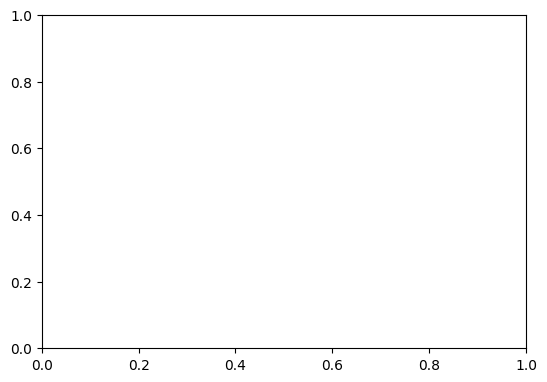

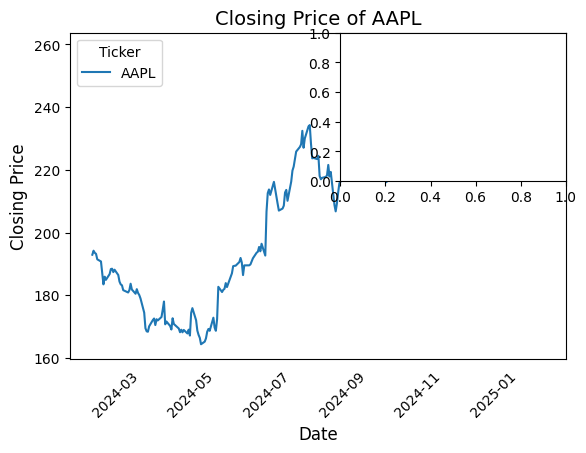

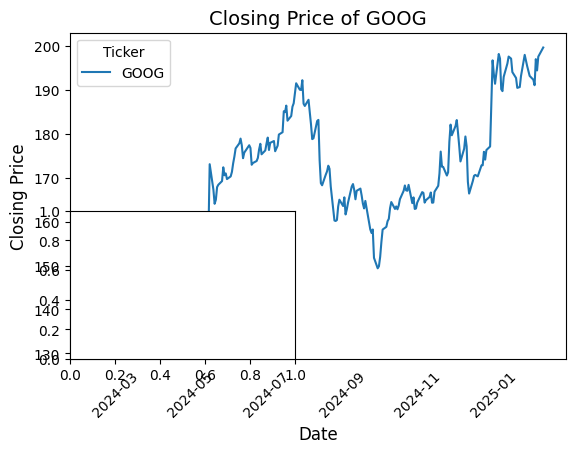

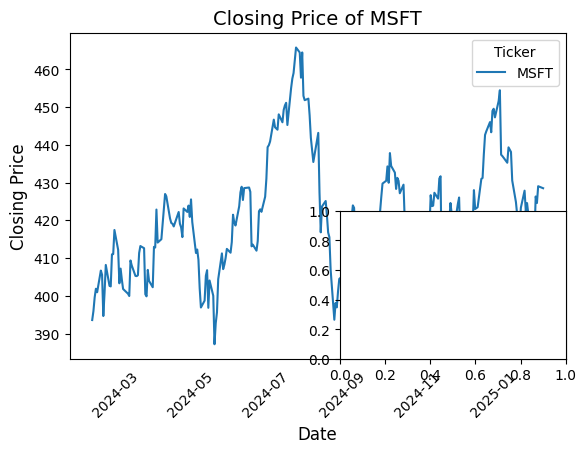

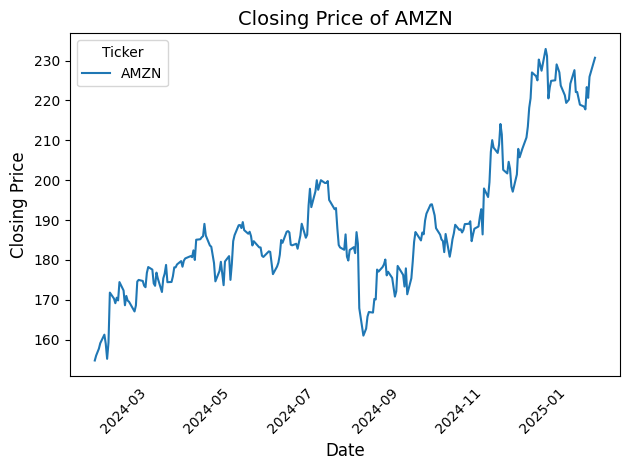

In [ ]:
import matplotlib.pyplot as plt

# Assuming company_dict is already defined as in previous examples

plt.figure(figsize=(15, 10))  # Increase figure size for better visibility
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)  # Adjust subplot spacing

# Loop through the dictionary and plot the 'Close' for each company
for i, (company, data) in enumerate(company_dict.items(), 1):
    plt.subplot(2, 2, i)

    # Check if 'Close' column exists and is not empty
    if 'Close' in data and not data['Close'].empty:
        data['Close'].plot()  # Plot the 'Close' for each company
    else:
        plt.text(0.5, 0.5, "No Data", horizontalalignment='center', verticalalignment='center', fontsize=15)

    plt.ylabel('Closing Price', fontsize=12)  # Increase label font size
    plt.xlabel('Date', fontsize=12)  # Increase x-axis label font size
    plt.title(f"Closing Price of {company}", fontsize=14)  # Increase title font size

    # Rotate x-axis labels and adjust the frequency of ticks
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust x-label font size
    plt.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove top and bottom ticks

plt.tight_layout()  # Ensure the plots don't overlap
plt.show()




## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

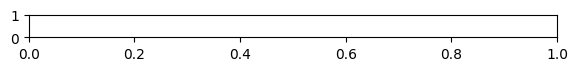

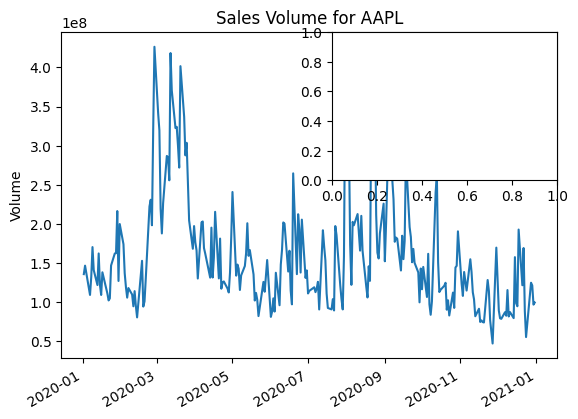

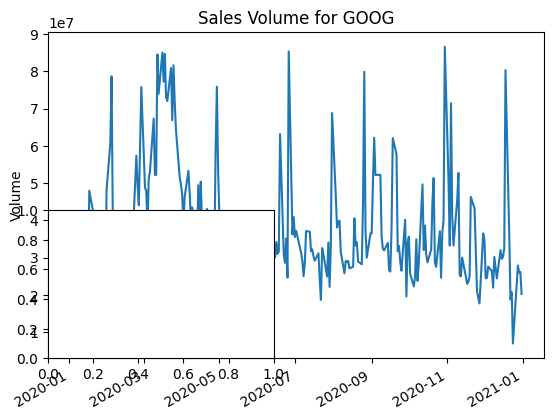

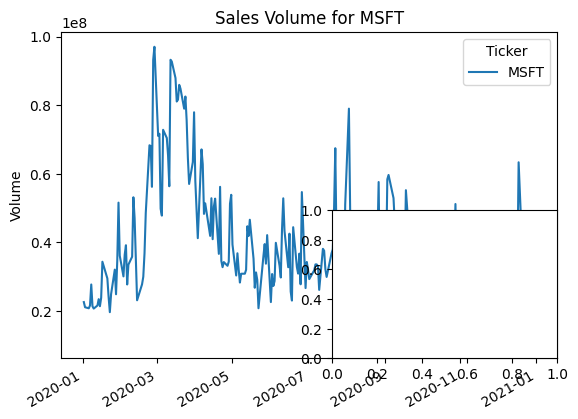

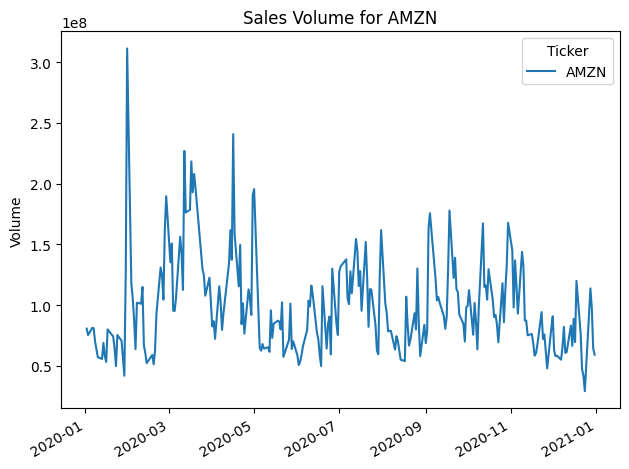

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


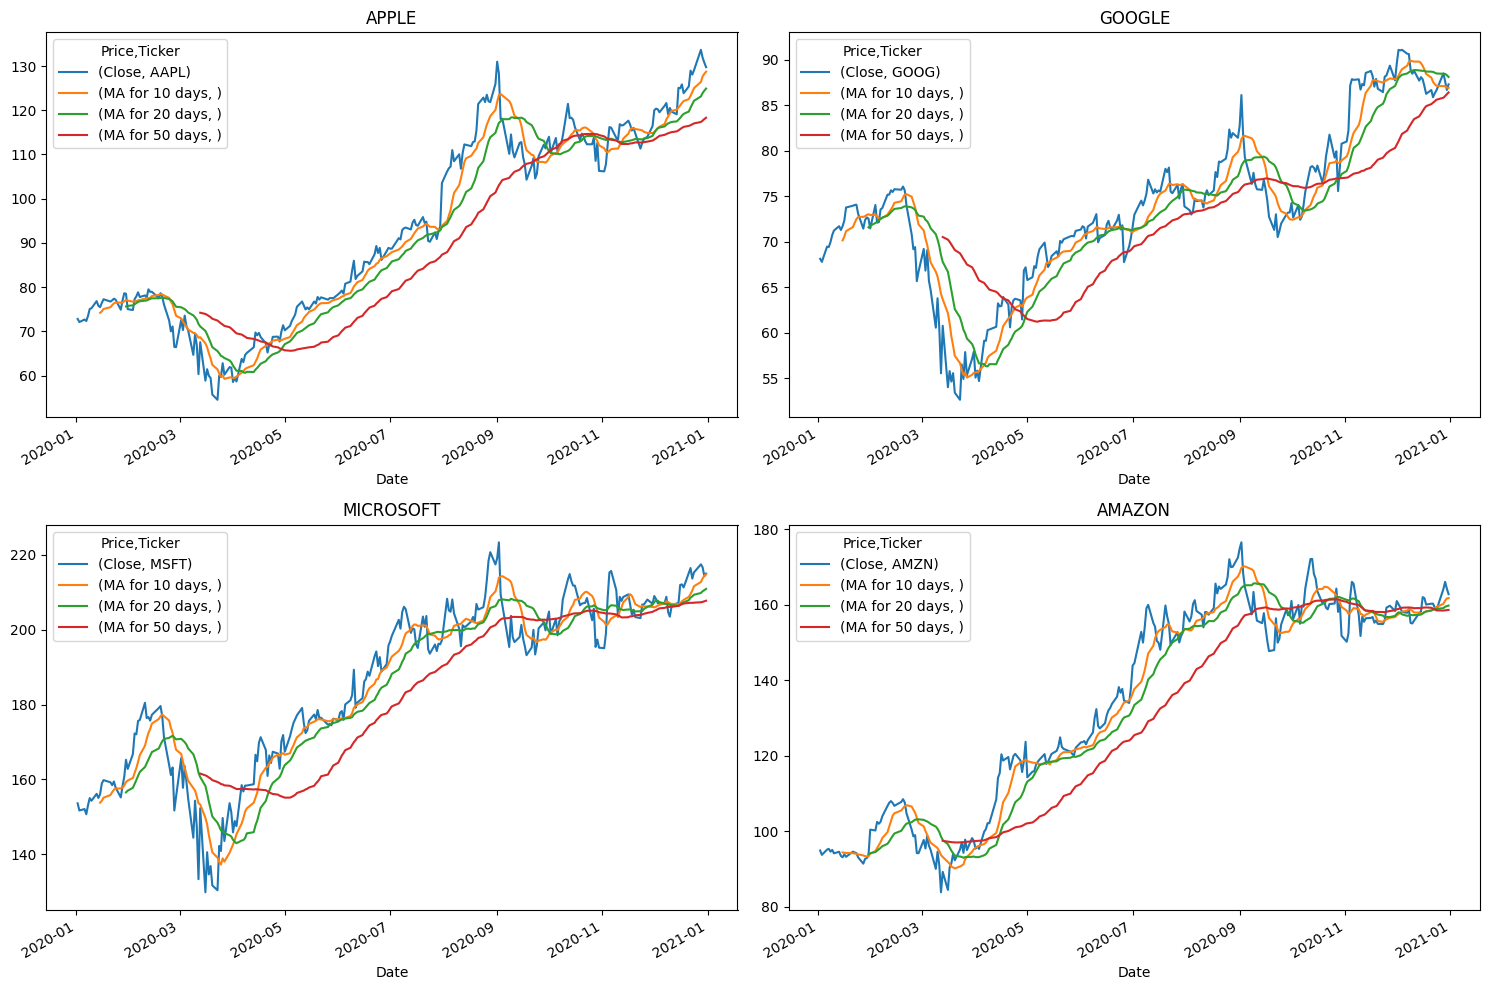

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch stock data using yfinance for 2020-01-01 to 2021-01-01
AAPL = yf.download('AAPL', start='2020-01-01', end='2021-01-01')
GOOG = yf.download('GOOG', start='2020-01-01', end='2021-01-01')
MSFT = yf.download('MSFT', start='2020-01-01', end='2021-01-01')
AMZN = yf.download('AMZN', start='2020-01-01', end='2021-01-01')

# List of company DataFrames
company_list = [AAPL, GOOG, MSFT, AMZN]
ma_day = [10, 20, 50]

# Calculate moving averages for each company
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot data for each company
AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

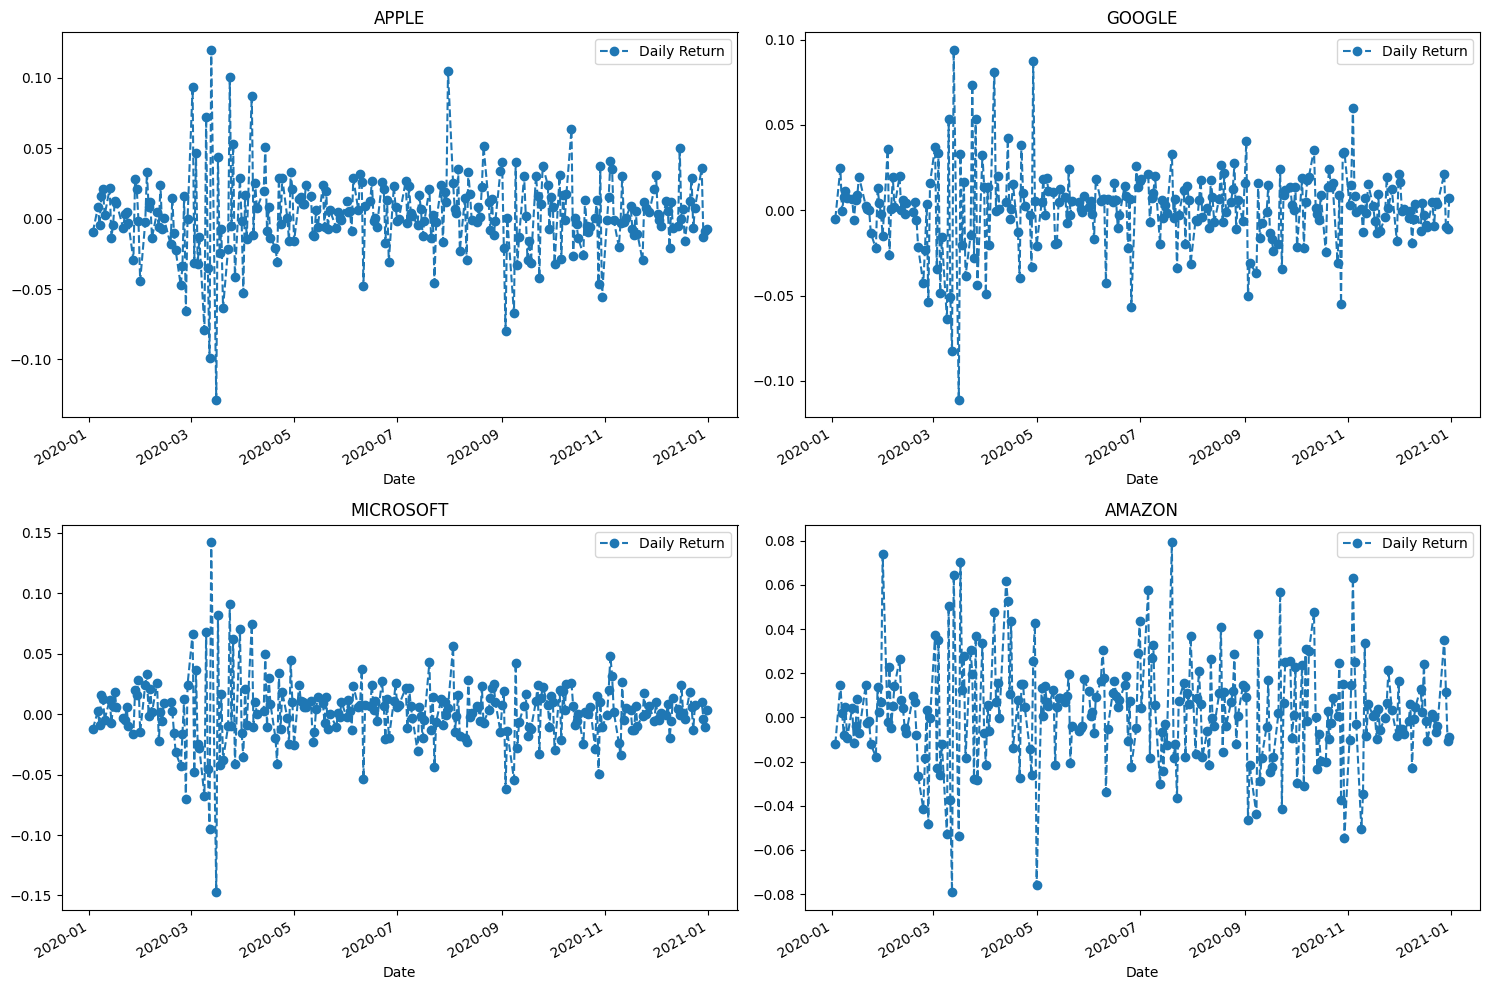

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


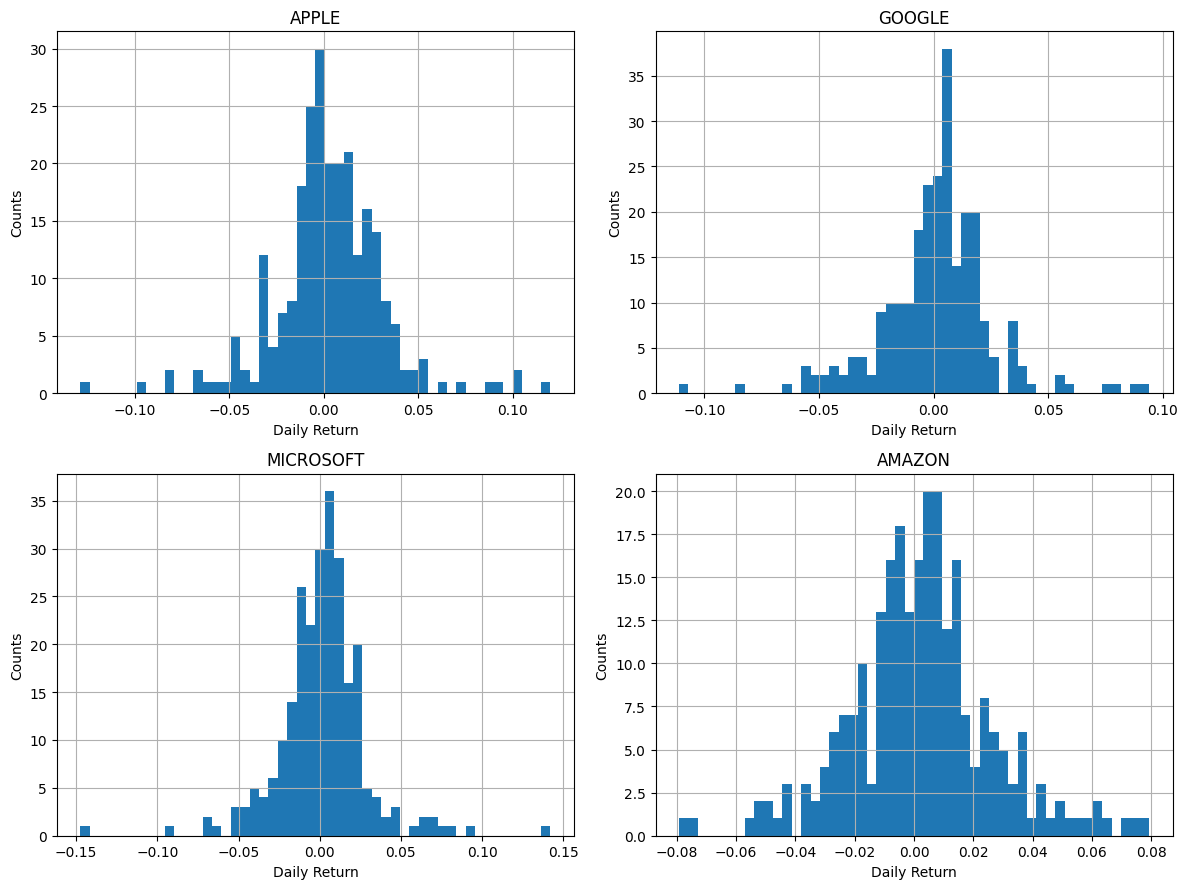

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch stock data using yfinance for 2020-01-01 to 2021-01-01
AAPL = yf.download('AAPL', start='2020-01-01', end='2021-01-01')
GOOG = yf.download('GOOG', start='2020-01-01', end='2021-01-01')
MSFT = yf.download('MSFT', start='2020-01-01', end='2021-01-01')
AMZN = yf.download('AMZN', start='2020-01-01', end='2021-01-01')

# List of company DataFrames
company_list = [AAPL, GOOG, MSFT, AMZN]
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Calculate daily returns for each company
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Plotting histograms of daily returns for each company
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_names[i - 1]}')

plt.tight_layout()
plt.show()


# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [ ]:
import yfinance as yf
import pandas as pd

# Define the tech stock list and date range
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']  # Example list of tech companies
start = '2020-01-01'  # Start date
end = '2021-01-01'    # End date

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.004907,-0.012452
2020-01-06,0.007968,0.014886,0.024657,0.002585
2020-01-07,-0.004703,0.002092,-0.000624,-0.009118
2020-01-08,0.016086,-0.007809,0.007881,0.015929


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

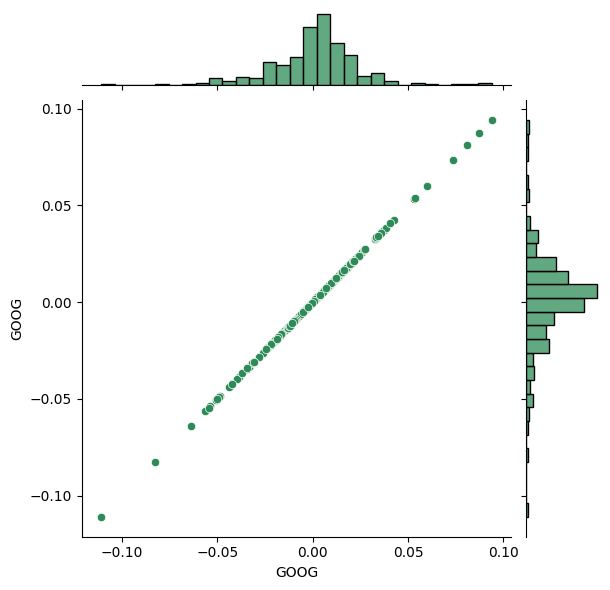

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
import seaborn as sns
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

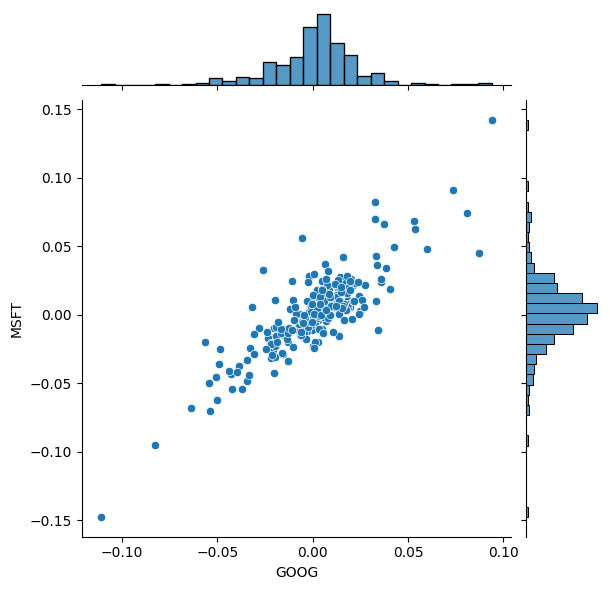

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

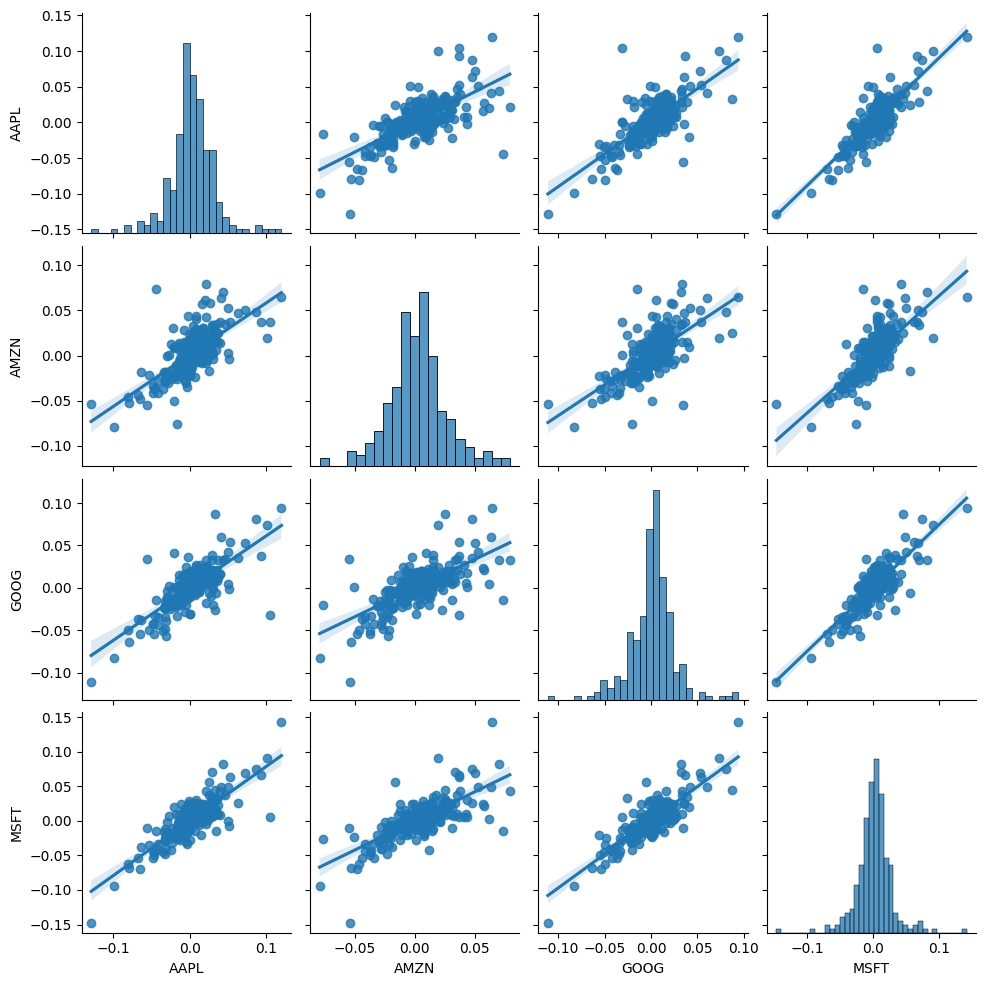

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

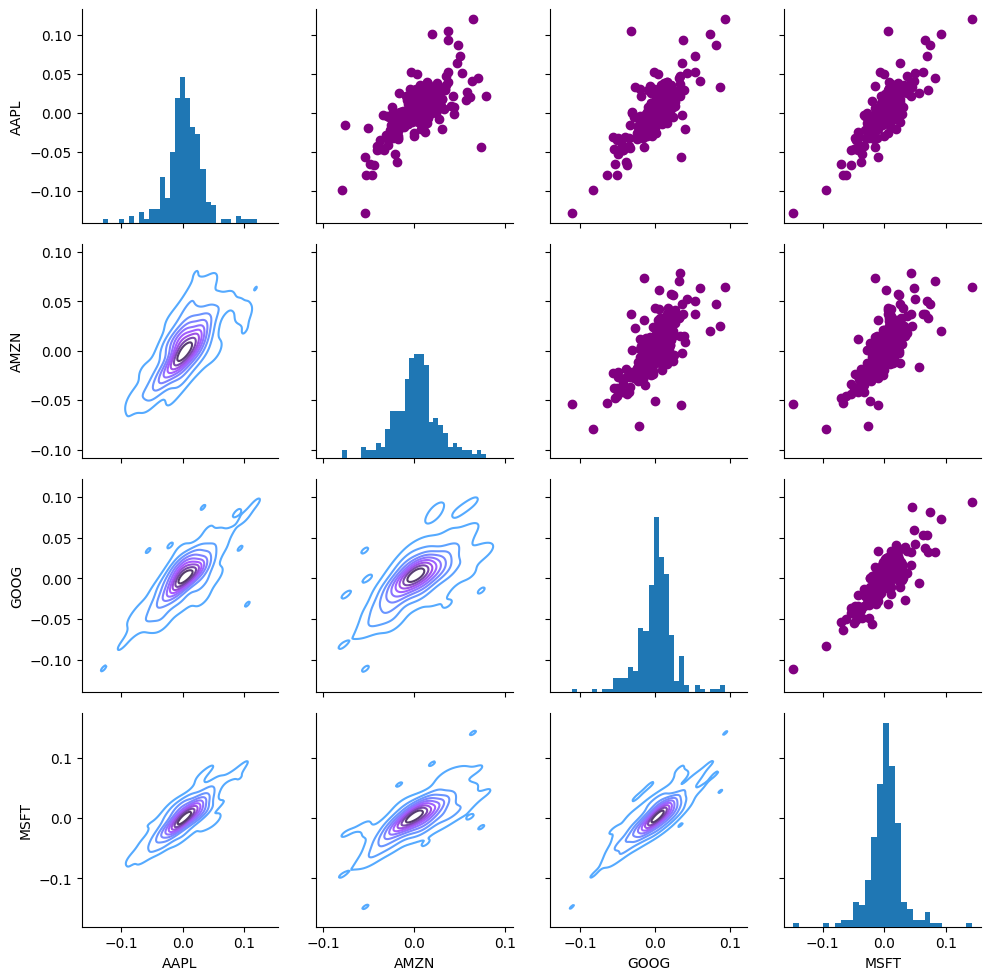

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

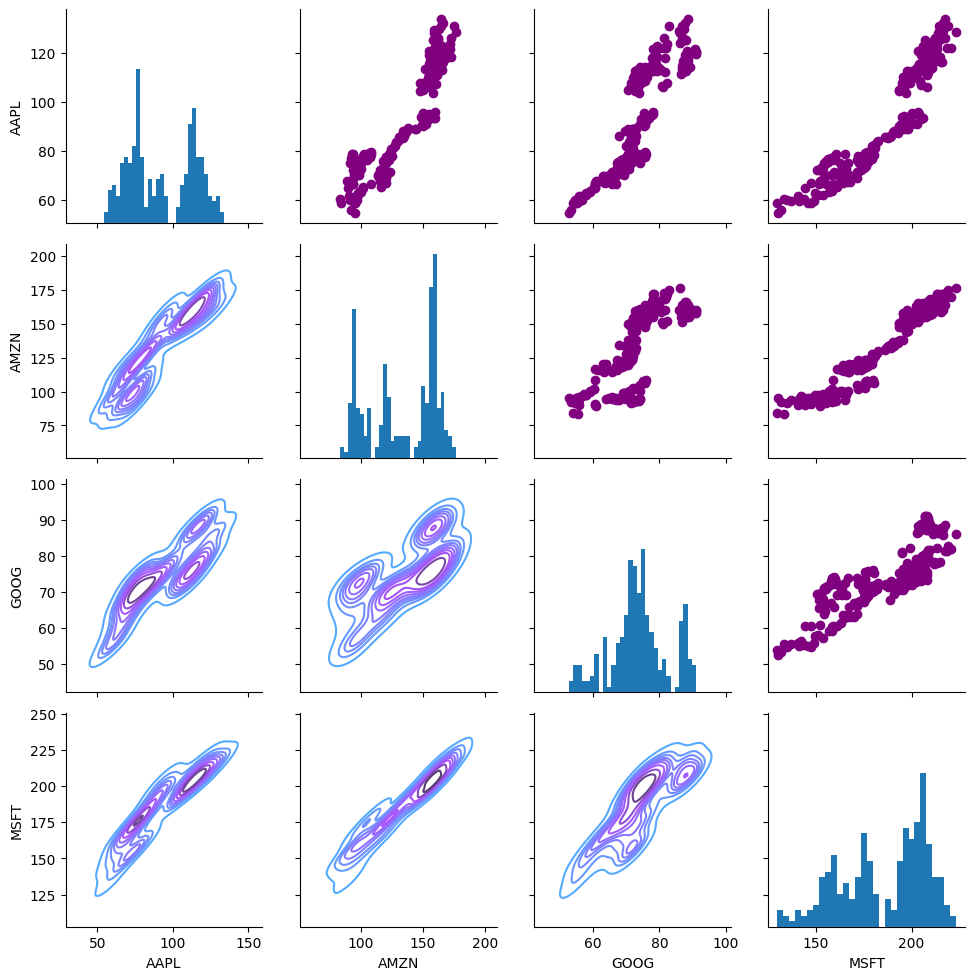

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

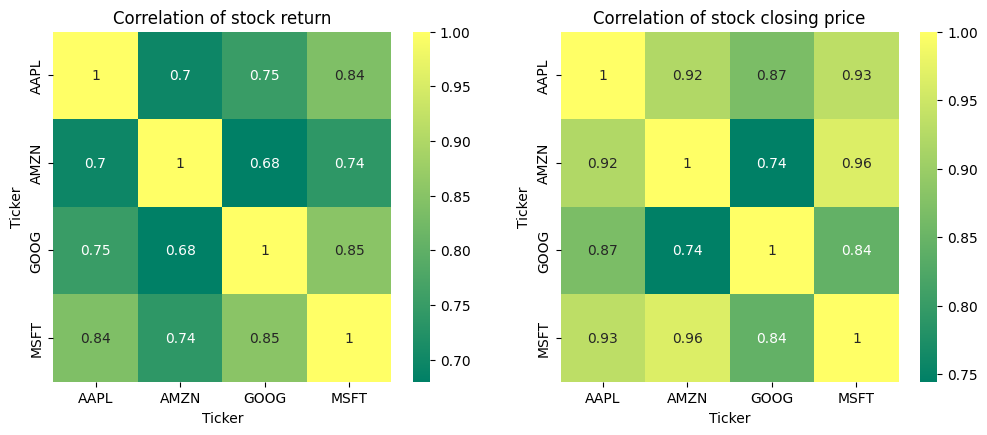

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

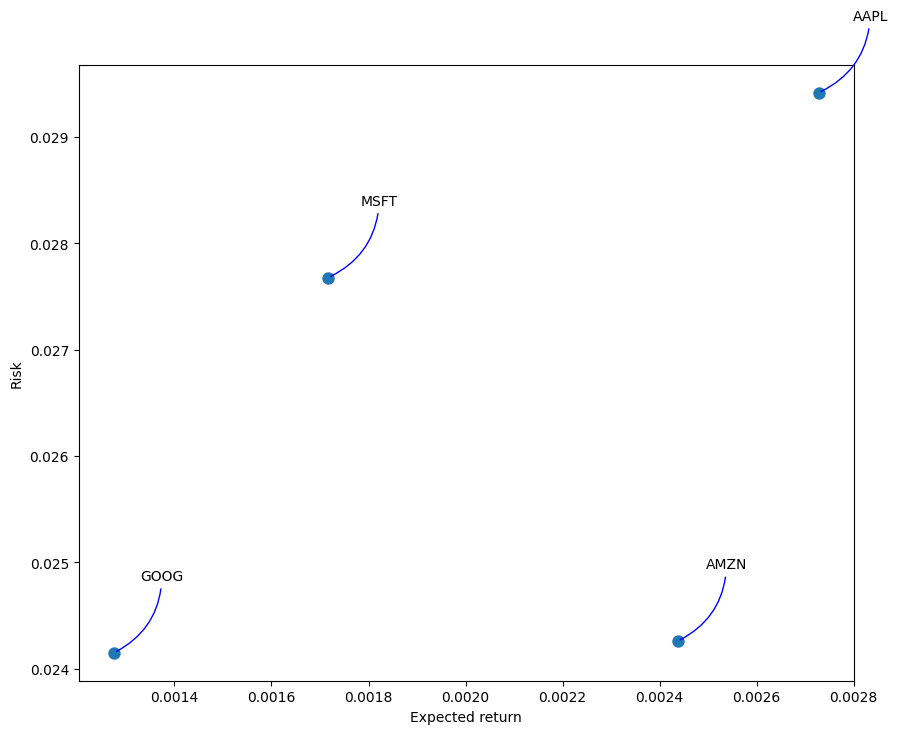

In [ ]:
import numpy as np

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [ ]:
import yfinance as yf
from datetime import datetime

# Fetch stock data for Apple (AAPL) from 2012-01-01 to the current date
df = yf.download('AAPL', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Show the data
print(df)


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2012-01-03   12.388996   12.427257   12.321814   12.333865  302220800
2012-01-04   12.455575   12.492933   12.330248   12.351939  260022000
2012-01-05   12.593860   12.609525   12.432380   12.501070  271269600
2012-01-06   12.725513   12.736057   12.629710   12.646280  318292800
2012-01-09   12.705325   12.886688   12.693877   12.818903  394024400
...                ...         ...         ...         ...        ...
2025-01-14  233.279999  236.119995  232.470001  234.750000   39435300
2025-01-15  237.869995  238.960007  234.429993  234.639999   39832000
2025-01-16  228.259995  238.009995  228.029999  237.350006   71759100
2025-01-17  229.979996  232.289993  228.479996  232.119995   68247100
2025-01-21  222.639999  224.419998  219.380005  224.000000   97333260

[3282 rows x 5 colu

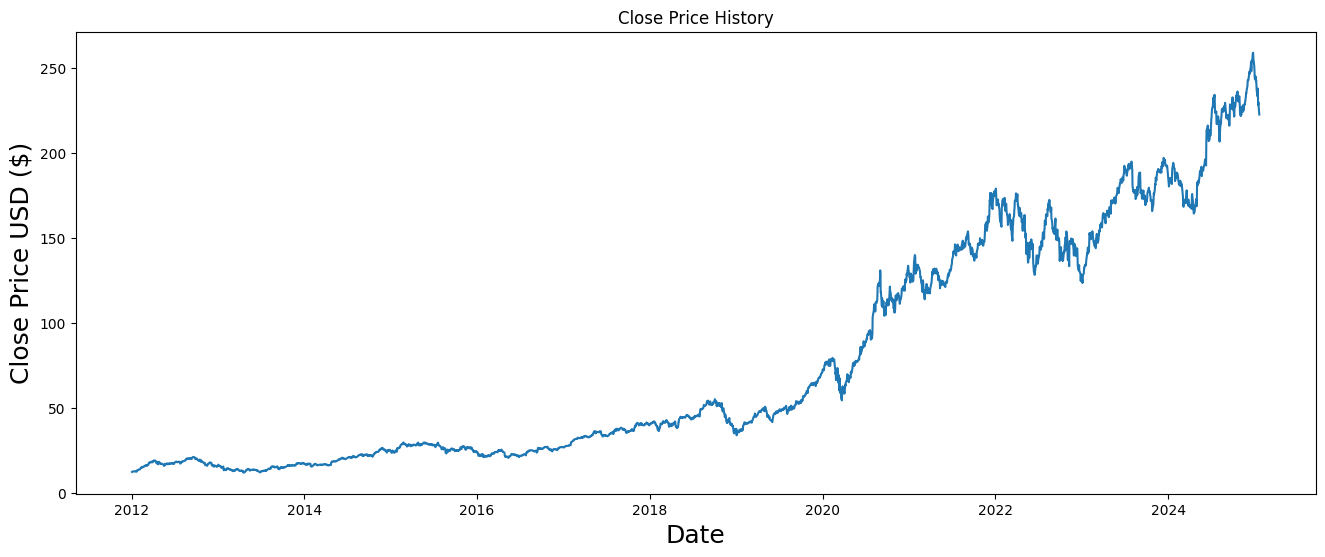

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3118

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Example dataset with numeric values
dataset = pd.DataFrame({
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [5, 15, 25, 35, 45]
})

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the dataset
scaled_data = scaler.fit_transform(dataset)

# Output the scaled data
print("Scaled Data (as a NumPy array):")
print(scaled_data)


Scaled Data (as a NumPy array):
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [0.75 0.75]
 [1.   1.  ]]


In [ ]:
# # Check scaled_data
# print(f"Scaled data shape: {scaled_data.shape}")

# # Create training dataset
# train_data = scaled_data[0:int(training_data_len), :]
# print(f"Train data shape: {train_data.shape}")

# x_train = []
# y_train = []

# if len(train_data) > 60:  # Ensure enough data for sequences
#     for i in range(60, len(train_data)):
#         x_train.append(train_data[i-60:i, 0])  # Sequence of 60 time steps
#         y_train.append(train_data[i, 0])      # Corresponding target value
#         if i <= 61:  # Debug the first two iterations
#             print("x_train sample:", x_train[-1])
#             print("y_train sample:", y_train[-1])
#             print()
# else:
#     print("Insufficient data for training sequences.")

# # Convert lists to numpy arrays
# x_train, y_train = np.array(x_train), np.array(y_train)

# # Check if x_train is not empty before reshaping
# if x_train.size > 0:
#     x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#     print(f"x_train shape: {x_train.shape}")
# else:
#     print("x_train is empty. Reshape skipped.")

# Adjust the sequence length to a smaller number (e.g., 2 or 3)
sequence_length = 2  # or 3, based on your choice

# Create training dataset
train_data = scaled_data[0:int(training_data_len), :]
print(f"Train data shape: {train_data.shape}")

x_train = []
y_train = []

if len(train_data) >= sequence_length:  # Ensure enough data for sequences
    for i in range(sequence_length, len(train_data)):
        x_train.append(train_data[i-sequence_length:i, 0])  # Sequence of 'sequence_length' time steps
        y_train.append(train_data[i, 0])                   # Corresponding target value
        if i <= sequence_length:  # Debug the first few iterations
            print("x_train sample:", x_train[-1])
            print("y_train sample:", y_train[-1])
            print()
else:
    print("Insufficient data for training sequences.")

# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Check if x_train is not empty before reshaping
if x_train.size > 0:
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    print(f"x_train shape: {x_train.shape}")
else:
    print("x_train is empty. Reshape skipped.")


Train data shape: (5, 2)
x_train sample: [0.   0.25]
y_train sample: 0.5

x_train shape: (3, 2, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
# Ensure x_train is a 3D array with shape (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)






/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4987


In [ ]:
# Check training_data_len and length of scaled_data
print(f"training_data_len: {training_data_len}")
print(f"Length of scaled_data: {len(scaled_data)}")

# Ensure that we have enough data to create both training and test data
max_training_data_len = len(scaled_data) - 60  # Leave at least 60 for test data

# If training_data_len is too large, adjust it
if training_data_len > max_training_data_len:
    print(f"Training data length is too large. Adjusting it to {max_training_data_len}.")
    training_data_len = max_training_data_len

# Check if we have enough data to slice for x_test
if len(scaled_data) >= training_data_len + 60:
    test_data = scaled_data[training_data_len - 60:, :]
    print(f"Shape of test_data: {test_data.shape}")

    x_test = []
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])  # Collect 60 time steps for each sample

    print(f"Length of x_test: {len(x_test)}")  # Should be > 0 now
    if len(x_test) > 0:
        print(f"First item in x_test: {x_test[0]}")  # Check the first item
else:
    print("Not enough data in scaled_data to create test_data. Adjust training_data_len.")


training_data_len: -55
Length of scaled_data: 5
Shape of test_data: (5, 2)
Length of x_test: 0


In [ ]:
print(valid[['Predictions']].head(10))  # Print a larger sample


Price      Predictions
Ticker                
Date                  
2024-10-30   12.451077
2024-10-31   12.451077
2024-11-01   12.451077
2024-11-04   12.451077
2024-11-05   12.451077
2024-11-06   12.451077
2024-11-07   12.451077
2024-11-08   12.451077
2024-11-11   12.451077
2024-11-12   12.451077


Length of valid data: 55
Length of predictions: 55
Valid DataFrame head after adding predictions:
Price      Predictions
Ticker                
Date                  
2024-10-30   12.451077
2024-10-31   12.451077
2024-11-01   12.451077
2024-11-04   12.451077
2024-11-05   12.451077


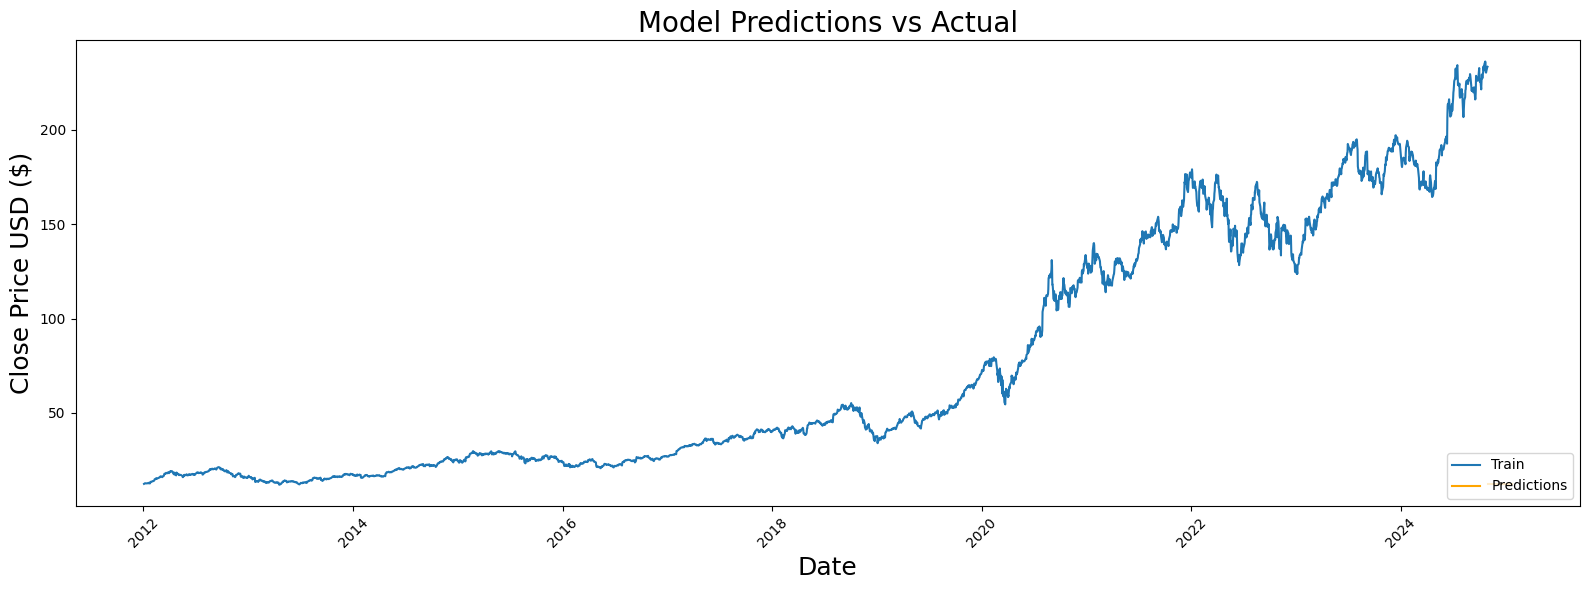

In [ ]:
import matplotlib.pyplot as plt

# Check the lengths of predictions and valid data
print(f"Length of valid data: {valid.shape[0]}")
print(f"Length of predictions: {len(predictions)}")

# Ensure the predictions are of the same length as the valid data
if len(predictions) == valid.shape[0]:
    valid['Predictions'] = predictions  # Directly assign predictions to 'Predictions' column
else:
    print(f"Length mismatch: {len(predictions)} predictions and {valid.shape[0]} rows in valid data.")

# Check if predictions were added correctly
print(f"Valid DataFrame head after adding predictions:")
print(valid[['Predictions']].head())  # Print the first few rows to check predictions

# Plotting the results
plt.figure(figsize=(16, 6))
plt.title('Model Predictions vs Actual', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the train data (ensure 'Close' exists in train)
try:
    if 'Close' in train.columns:
        plt.plot(train['Close'], label='Train')
    else:
        print("Train data does not have 'Close' column.")
except KeyError:
    print("Train data does not have 'Close' column.")

# Plot the valid data with predictions
try:
    if 'Predictions' in valid.columns:
        # Ensure valid.index is a DatetimeIndex
        if isinstance(valid.index, pd.DatetimeIndex):
            plt.plot(valid.index, valid['Predictions'], label='Predictions', color='orange')
        else:
            print("Valid data does not have a DatetimeIndex.")
    else:
        print("Valid data does not have 'Predictions' column.")
except KeyError:
    print("Valid data does not have 'Predictions' column.")

# Check if train data has date information (index or column)
if 'Date' not in valid.columns and isinstance(valid.index, pd.DatetimeIndex):
    plt.xticks(rotation=45)

plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout for better display
plt.show()


In [ ]:
# Show the valid and predicted prices
valid

Price,Close,High,Low,Open,Volume,Price,Predictions
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,Predictions,
Date,,,,,,,
2024-10-30,229.847122,233.213414,229.297724,232.354358,47070900,12.451077,12.451077
2024-10-31,225.661728,229.577418,225.122313,229.087951,64370100,12.451077,12.451077
2024-11-01,222.665024,225.102345,220.027926,220.727153,65276700,12.451077,12.451077
2024-11-04,221.766006,222.545148,219.468546,220.747138,44944500,12.451077,12.451077
2024-11-05,223.204422,223.703872,220.896963,221.556241,28111300,12.451077,12.451077
2024-11-06,222.475235,225.821559,220.946918,222.365355,54561100,12.451077,12.451077
2024-11-07,227.229996,227.629565,224.323205,224.383137,42137700,12.451077,12.451077
2024-11-08,226.960007,228.660004,226.410004,227.169998,38328800,12.451077,12.451077


# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)